21:35:16 INFO    opendrift:576: OpenDriftSimulation initialised (version 1.14.6)
21:35:16 INFO    opendrift.models.basemodel.environment:203: Adding a global landmask from GSHHG
21:35:16 INFO    opendrift.models.basemodel.environment:227: Fallback values will be used for the following variables which have no readers: 
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	x_sea_water_velocity: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	y_sea_water_velocity: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_height: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_wave_significant_height: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	sea_ice_area_fraction: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	x_wind: 0.000000
21:35:16 INFO    opendrift.models.basemodel.environment:230: 	y_wind: 0.000000
21:35:16 INFO    opendrift.models.basemodel

--------------------
Reader performance:
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
https://tds.hycom.org/thredds/dodsC/FMRC_ESPC-D-V02_uv3z/FMRC_ESPC-D-V02_uv3z_best.ncd
 0:00:24.8  total
 0:00:00.0  preparing
 0:00:24.8  reading
 0:00:00.2  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ncep_global/NCEP_Global_Atmospheric_Model_best.ncd
 0:00:16.4  total
 0:00:00.0  preparing
 0:00:16.4  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
Performance:
   50.7 total time
    0.2 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
   50.4 main loop
      0.7 updating elements
        0.7 vertical mixing
    0.0 cleaning up
--------------------
Model:	PhytoplanktonDrift     (OpenDrift version 1.14.6)
	500 active Phyto particles 

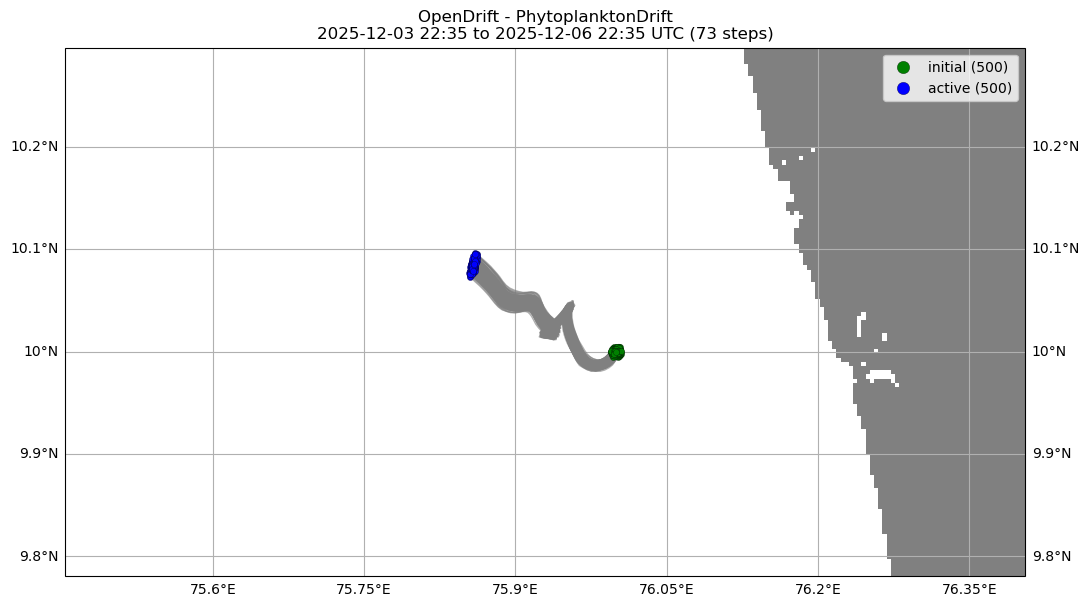

21:36:09 WARNING opendrift:2469: Plotting fast. This will make your plots less accurate.
21:36:09 INFO    opendrift:3107: Preparing animation for notebook....


21:36:48 INFO    opendrift:3080: Time to make animation: 0:00:39.561055
21:36:48 INFO    opendrift:3107: Preparing animation for notebook....


21:37:02 INFO    opendrift.models.oceandrift:643: Time to make animation: 0:00:14.295764


In [95]:
"""
Cod egg
=============
"""

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.phyto import PhytoplanktonDrift
from datetime import datetime, timedelta

o = PhytoplanktonDrift(loglevel=20)  # Set loglevel to 0 for debug information

#Forcing with Topaz ocean model and MEPS atmospheric model
o.add_readers_from_list([
    'https://tds.hycom.org/thredds/dodsC/FMRC_ESPC-D-V02_uv3z/FMRC_ESPC-D-V02_uv3z_best.ncd',
    'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ncep_global/NCEP_Global_Atmospheric_Model_best.ncd'])

#%%
# Adjusting some configuration
o.set_config('drift:vertical_mixing', True)
o.set_config('vertical_mixing:diffusivitymodel', 'windspeed_Sundby1983') # windspeed parameterization for eddy diffusivity
#%%
# Vertical mixing requires fast time step
o.set_config('vertical_mixing:timestep', 60.) # seconds

#%%
# spawn NEA cod eggs at defined position and time
time = datetime.now()
o.seed_elements(76 , 10, z=0, radius=200, number=500,
                time=time, diameter=0.0014, density=1020)
#o.seed_elements(76, 9, z=0, radius=200, number=500,
 #               time=time, diameter=0.0014, density=1050)
# o.seed_elements(13.5, 68., z=0, radius=2000, number=500,
#                 time=time, diameter=0.0014, density=1050)
# o.seed_elements(13., 67.8, z=0, radius=2000, number=500,
#                 time=time, diameter=0.0014, density=1050)

# #%%
# Running model
model_run = o.run(duration=timedelta(hours=72), time_step=3600)

#%%
# Print and plot results.
# At the end the wind vanishes, and eggs come to surface
print(o)

o.plot(fast=True)
o.animation(fast=True, color='z')

#%%
# .. image:: /gallery/animations/example_codegg_0.gif

#%% Vertical distribution of particles
o.animate_vertical_distribution()

#%%
# .. image:: /gallery/animations/example_codegg_1.gif


20:58:28 WARNING py.warnings:230: /var/folders/mf/6gftk9cs5cj9wfw8h2d7_3hr0000gn/T/ipykernel_3752/3969944016.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])



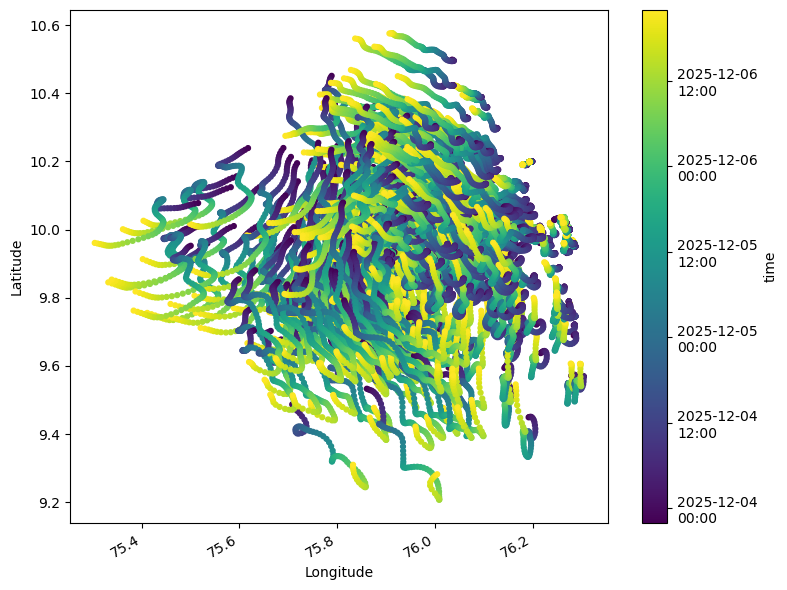

In [85]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert xarray Dataset to a DataFrame and bring the index levels (trajectory, time) into columns
testdata = model_run.to_dataframe().reset_index()

# Color the scatter by time: convert datetimes to matplotlib numeric values
time_nums = mdates.date2num(testdata['time'])

plt.figure(figsize=(8, 6))
sc = plt.scatter(testdata['lon'], testdata['lat'], c=time_nums, cmap='viridis', marker='o', s=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar showing the time (formatted)
cbar = plt.colorbar(sc)
cbar.set_label('time')
cbar_ticks = cbar.get_ticks()
cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])

plt.gcf().autofmt_xdate()
plt.show()






In [103]:
# Import modules
import copernicusmarine

# Load dataframe
request_dataframe = copernicusmarine.read_dataframe(
    dataset_id = "cmems_mod_glo_bgc-nut_anfc_0.25deg_P1D-m",
    username = "mhussain4",
    password = "Supperdonkey77@",
    minimum_longitude = testdata['lon'].min(),
    maximum_longitude = testdata['lon'].max(),
    minimum_latitude = testdata['lat'].max(),
    maximum_latitude = testdata['lat'].max(),
   # variables = ["CHL"],
    start_datetime = testdata['time'].min().strftime('%Y-%m-%d'),
    end_datetime = testdata['time'].max().strftime('%Y-%m-%d')
)

# Load dataframe
request_kd = copernicusmarine.read_dataframe(
    dataset_id = "cmems_mod_glo_bgc-optics_anfc_0.25deg_P1D-m",
    username = "mhussain4",
    password = "Supperdonkey77@",
    minimum_longitude = testdata['lon'].min(),
    maximum_longitude = testdata['lon'].max(),
    minimum_latitude = testdata['lat'].max(),
    maximum_latitude = testdata['lat'].max(),
   # variables = ["CHL"],
    start_datetime = testdata['time'].min().strftime('%Y-%m-%d'),
    end_datetime = testdata['time'].max().strftime('%Y-%m-%d')
)

request_phyto= copernicusmarine.read_dataframe(
    dataset_id = "cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m",
    username = "mhussain4",
    password = "Supperdonkey77@",
    minimum_longitude = testdata['lon'].min(),
    maximum_longitude = testdata['lon'].max(),
    minimum_latitude = testdata['lat'].max(),
    maximum_latitude = testdata['lat'].max(),
   # variables = ["CHL"],
    start_datetime = testdata['time'].min().strftime('%Y-%m-%d'),
    end_datetime = testdata['time'].max().strftime('%Y-%m-%d')
)





INFO - 2025-12-03T22:04:19Z - Selected dataset version: "202311"
22:04:19 INFO    copernicusmarine:251: Selected dataset version: "202311"
INFO - 2025-12-03T22:04:19Z - Selected dataset part: "default"
22:04:19 INFO    copernicusmarine:271: Selected dataset part: "default"
INFO - 2025-12-03T22:04:45Z - Selected dataset version: "202311"
22:04:45 INFO    copernicusmarine:251: Selected dataset version: "202311"
INFO - 2025-12-03T22:04:45Z - Selected dataset part: "default"
22:04:45 INFO    copernicusmarine:271: Selected dataset part: "default"
INFO - 2025-12-03T22:04:48Z - Selected dataset version: "202311"
22:04:48 INFO    copernicusmarine:251: Selected dataset version: "202311"
INFO - 2025-12-03T22:04:48Z - Selected dataset part: "default"
22:04:48 INFO    copernicusmarine:271: Selected dataset part: "default"


In [119]:
nutrients =  request_dataframe.reset_index()
kd = request_kd.reset_index()
phyto = request_phyto.reset_index()

phyto_nutri = pd.merge(nutrients,kd).merge(phyto)

In [120]:
phyto_nutri

depth  latitude  longitude       time        fe       no3  \
0       0.494025      10.5      75.50 2025-12-03  0.000936  0.037282   
1       0.494025      10.5      75.50 2025-12-04  0.000855  0.042747   
2       0.494025      10.5      75.50 2025-12-05  0.000863  0.060662   
3       0.494025      10.5      75.50 2025-12-06  0.001062  0.103602   
4       0.494025      10.5      75.75 2025-12-03  0.001879  0.106573   
..           ...       ...        ...        ...       ...       ...   
595  5727.916504      10.5      75.75 2025-12-06       NaN       NaN   
596  5727.916504      10.5      76.00 2025-12-03       NaN       NaN   
597  5727.916504      10.5      76.00 2025-12-04       NaN       NaN   
598  5727.916504      10.5      76.00 2025-12-05       NaN       NaN   
599  5727.916504      10.5      76.00 2025-12-06       NaN       NaN   

          po4        si        kd       chl      phyc  
0    0.260589  0.739156  0.079375  0.568839  3.149183  
1    0.259598  0.785784  0.076967  0.551578  2.928548  
2    0.257746  0.833769  0.084051  0.623140  3.172447  
3    0.256053  0.895073  0.097646  0.802901  3.835513  
4    0.258042  0.898547  0.116708  1.082531  5.139380  
..        ...       ...       ...       ...       ...  
595       NaN       NaN       NaN       NaN       NaN  
596       NaN       NaN       NaN       NaN       NaN  
597       NaN       NaN       NaN       NaN       NaN  
598       NaN       NaN       NaN       NaN       NaN  
599       NaN       NaN       NaN       NaN       NaN  

[600 rows x 11 columns]

In [121]:
phyto_nutri.columns

Index(['depth', 'latitude', 'longitude', 'time', 'fe', 'no3', 'po4', 'si',
       'kd', 'chl', 'phyc'],
      dtype='object')

In [ ]:

import numpy as np
from scipy.spatial import cKDTree

# Build KDTree on df2 coordinates
tree = cKDTree(phyto_nutri[["latitude", "longitude"]].values)

# Query nearest neighbor for df1 points
dist, idx = tree.query(testdata[["lat", "lon"]].values)
# Add results to df1
testdata["fe"] = phyto_nutri["fe"].iloc[idx].values
testdata["no3"] = phyto_nutri["no3"].iloc[idx].values
testdata["po4"] = phyto_nutri["po4"].iloc[idx].values
testdata["si"] = phyto_nutri["si"].iloc[idx].values
testdata["kd"] = phyto_nutri["kd"].iloc[idx].values
testdata["chl"] = phyto_nutri["chl"].iloc[idx].values


testdata["distance"] = dist
testdata=testdata.dropna()

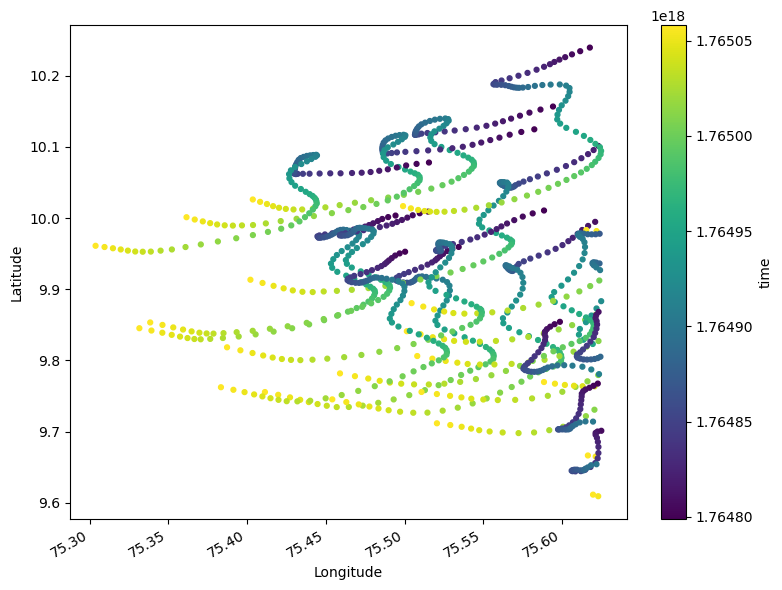

In [130]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sc = plt.scatter(testdata['lon'], testdata['lat'], c=testdata['time'], cmap='viridis', marker='o', s=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar showing the time (formatted)
cbar = plt.colorbar(sc)
cbar.set_label('time')
cbar_ticks = cbar.get_ticks()
#cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])

plt.gcf().autofmt_xdate()
plt.show()


In [132]:
testdata.to_csv("first_data.csv")
firstdata = pd.read_csv("first_data.csv")
firstdata['lon'].values

array([75.53435 , 75.53029 , 75.527176, ..., 75.3148  , 75.309456,
       75.303764], shape=(1061,))

In [93]:
import matplotlib.pyplot as plt

# convert time column to datetimes and to matplotlib numeric values for coloring
times = pd.to_datetime(firstdata['time'])
time_nums = mdates.date2num(times)

plt.figure(figsize=(8, 6))
sc = plt.scatter(firstdata['lon'].values, firstdata['lat'].values, c=time_nums, cmap='viridis', marker='o', s=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar showing the time (formatted)
cbar = plt.colorbar(sc)
cbar.set_label('time')
cbar_ticks = cbar.get_ticks()
cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])

plt.gcf().autofmt_xdate()
plt.show()


21:05:43 WARNING py.warnings:230: /var/folders/mf/6gftk9cs5cj9wfw8h2d7_3hr0000gn/T/ipykernel_3752/3746912859.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])



In [94]:
# Ensure local package/module is importable (install editable if needed)
from phyt_growth import phyt_growth

P  = np.random.rand(50, 50, 20)
I  = np.random.rand(50, 50, 20)
N  = testdata['no3']
Ph = testdata['po4']
Fe = testdata['fe']
Si = testdata['si']
T  = testdata['sea_water_temperature']

phyt_growth(P, I, N, Ph, Fe, Si, T)



ModuleNotFoundError: No module named 'phyt_growth'

In [ ]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert xarray Dataset to a DataFrame and bring the index levels (trajectory, time) into columns
#testdata = model_run.to_dataframe().reset_index()

# Color the scatter by time: convert datetimes to matplotlib numeric values
growth = mdates.date2num(testdata['growth'])

plt.figure(figsize=(8, 6))
sc = plt.scatter(testdata['lon'], testdata['lat'], c=growth, cmap='viridis', marker='o', s=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar showing the time (formatted)
cbar = plt.colorbar(sc)
cbar.set_label('time')
cbar_ticks = cbar.get_ticks()
#cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])

plt.gcf().autofmt_xdate()
plt.show()




